# Projeto de Machine Learning - Wine Quality

#### Para este projeto será utilizado o dataset Wine Quality Red, disponível no site: 
https://archive.ics.uci.edu/ml/datasets/Wine+Quality


<p> O objetivo deste estudo é definir qual o melhor modelo de Machine Learning para prever a qualidade do vinho com base nos dados abaixo.</p>

### Dicionário das Variáveis:

<p>1 - fixed acidity - Acidez Fixa<p>
<p>2 - volatile acidity - Acidez Volátil<p>
<p>3 - citric acid - Ácido Cítrico<p>
<p>4 - residual sugar - Açúcar Residual<p>
<p>5 - chlorides - Cloretos<p>
<p>6 - free sulfur dioxide - Dióxido de Enxofre livre<p>
<p>7 - total sulfur dioxide - Dióxido de Enxofre Total<p>
<p>8 - density -  Densidade<p>
<p>9 - pH<p>
<p>10 - sulphates - Sulfatos<p>
<p>11 - alcohol - Álcool<p>
<p>Output variable (based on sensory data):<p>
<p>12 - quality (score between 0 and 10) -  Qualidade de 0 a 10<p>

## Pacotes

In [128]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import pickle

## Temas e cores

In [129]:
sns.set_palette("Accent")
sns.set_style("darkgrid")

## Explorando os Dados

In [130]:
dados = pd.read_csv('winequality-red.csv', sep = ';')

In [131]:
dados.shape

(1599, 12)

In [132]:
dados.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


<p> Verificando se há valores nulos. </p>

In [133]:
dados.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [134]:
dados.describe().round(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00
mean,8.32,0.53,0.27,2.54,0.09,15.87,46.47,1.00,3.31,0.66,10.42,5.64
std,1.74,0.18,0.19,1.41,0.05,10.46,32.90,0.00,0.15,0.17,1.07,0.81
min,4.60,0.12,0.00,0.90,0.01,1.00,6.00,0.99,2.74,0.33,8.40,3.00
25%,7.10,0.39,0.09,1.90,0.07,7.00,22.00,1.00,3.21,0.55,9.50,5.00
50%,7.90,0.52,0.26,2.20,0.08,14.00,38.00,1.00,3.31,0.62,10.20,6.00
75%,9.20,0.64,0.42,2.60,0.09,21.00,62.00,1.00,3.40,0.73,11.10,6.00
max,15.90,1.58,1.00,15.50,0.61,72.00,289.00,1.00,4.01,2.00,14.90,8.00


## Matriz de Correlação

In [135]:
dados.corr().round(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.00,-0.26,0.67,0.11,0.09,-0.15,-0.11,0.67,-0.68,0.18,-0.06,0.12
volatile acidity,-0.26,1.00,-0.55,0.00,0.06,-0.01,0.08,0.02,0.23,-0.26,-0.20,-0.39
citric acid,0.67,-0.55,1.00,0.14,0.20,-0.06,0.04,0.36,-0.54,0.31,0.11,0.23
residual sugar,0.11,0.00,0.14,1.00,0.06,0.19,0.20,0.36,-0.09,0.01,0.04,0.01
chlorides,0.09,0.06,0.20,0.06,1.00,0.01,0.05,0.20,-0.27,0.37,-0.22,-0.13
free sulfur dioxide,-0.15,-0.01,-0.06,0.19,0.01,1.00,0.67,-0.02,0.07,0.05,-0.07,-0.05
total sulfur dioxide,-0.11,0.08,0.04,0.20,0.05,0.67,1.00,0.07,-0.07,0.04,-0.21,-0.19
density,0.67,0.02,0.36,0.36,0.20,-0.02,0.07,1.00,-0.34,0.15,-0.50,-0.17
pH,-0.68,0.23,-0.54,-0.09,-0.27,0.07,-0.07,-0.34,1.00,-0.20,0.21,-0.06
sulphates,0.18,-0.26,0.31,0.01,0.37,0.05,0.04,0.15,-0.20,1.00,0.09,0.25


<p> Pela matriz de correlação as Variáveis explicativas de maior influência seriam o teor de alcool e a acidez volátil.</p>

## Comportamento da Variável Dependente (Y)

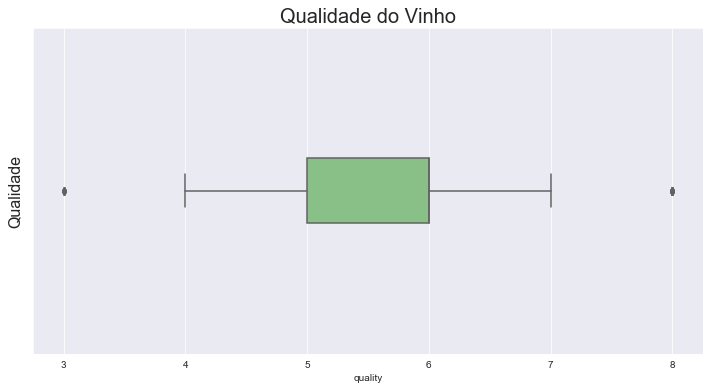

In [136]:
ax = sns.boxplot(dados['quality'], orient = 'h', width=0.2)
ax.figure.set_size_inches(12, 6)
ax.set_title('Qualidade do Vinho', fontsize=20)
ax.set_ylabel('Qualidade', fontsize=16)
ax

<p>Com base nesse boxplot é possível verificar que boa parte dos vinhos apresentam qualidade entre 4 e 7.</p>

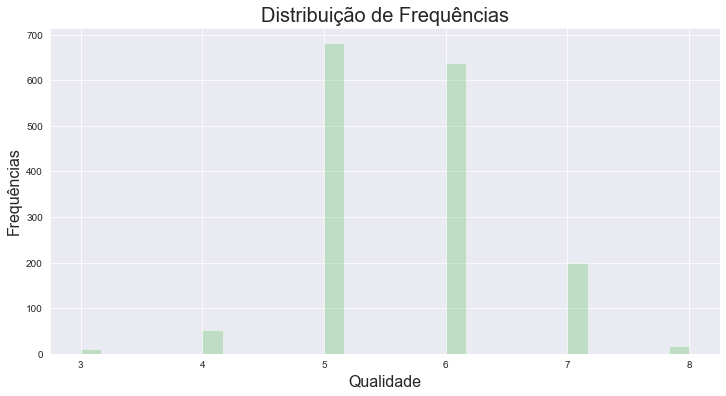

In [137]:
ax = sns.distplot(dados['quality'], kde=False)
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências', fontsize=20)
ax.set_ylabel('Frequências', fontsize=16)
ax.set_xlabel('Qualidade', fontsize=16)
ax

<p>Apresenta uma distribuição de frequência aparentemente normal.</p>

## Graficos de Dispersão entre as variáveis utilizando o pairplot

In [138]:
dados.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

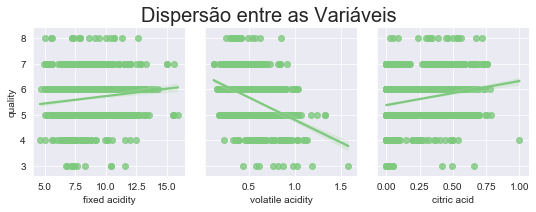

In [139]:
ax = sns.pairplot(dados, y_vars='quality', x_vars=['fixed acidity', 'volatile acidity', 'citric acid'], kind = 'reg')
ax.fig.suptitle('Dispersão entre as Variáveis', fontsize=20, y=1.1)
ax

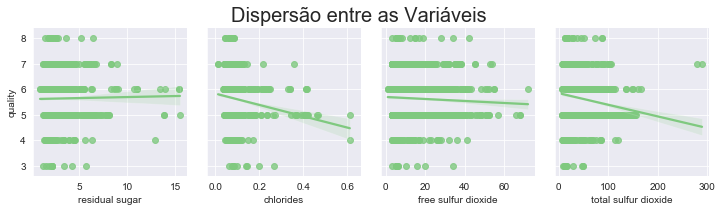

In [140]:
ax = sns.pairplot(dados, y_vars='quality', x_vars=['residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide'], kind = 'reg')
ax.fig.suptitle('Dispersão entre as Variáveis', fontsize=20, y=1.1)
ax

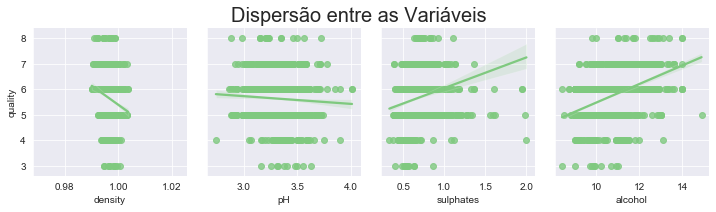

In [141]:
ax = sns.pairplot(dados, y_vars='quality', x_vars=['density',
       'pH', 'sulphates', 'alcohol'], kind = 'reg')
ax.fig.suptitle('Dispersão entre as Variáveis', fontsize=20, y=1.1)
ax

<p>Conforme visualizado anteriormente na matriz de correlação as Variáveis explicativas que possuem uma correlação mais acentuada com a variável dependente são: Álcool e Acidez Volátil.</p>

## Estimando o modelo de Regressão Linear

<p> Armazenando a Variável Dependente quality em uma Series do Pandas. </p>

In [142]:
y = dados['quality']

In [143]:
type(y)

pandas.core.series.Series

<p> Armazenando as Variaveis explicativas em um DataFrame do Pandas. </p>

In [144]:
X = dados[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']]

In [145]:
type(X)

pandas.core.frame.DataFrame

<p> Criando os datasets de treino e teste. </p>

In [146]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2811)

<p> Instanciando a Classe Linear Regression () </p>

In [147]:
modelo = LinearRegression()

<p> Treinamento do modelo </p>

In [148]:
modelo.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

<p> Obtendo o coeficiente de determinação dos dados de treino. </p>

In [149]:
print('R² = {}'.format(modelo.score(X_train, y_train).round(2)))

R² = 0.36


<p> Pelo coeficiente de determinação é possível afirmar que regressão linear não é o melhor modelo para realizar previsões neste dataset. Mesmo serão realizadas as previsões a seguir para que futuramente os resultados sejam comparados com outros modelos.</p>

In [150]:
y_previsto = modelo.predict(X_test)

<p> Obtendo o coeficiente de determinação dos dados de teste. </p>

In [151]:
print('R² = %s' % metrics.r2_score(y_test, y_previsto).round(2))

R² = 0.36


## Comparando as previsões com os dados de Treino

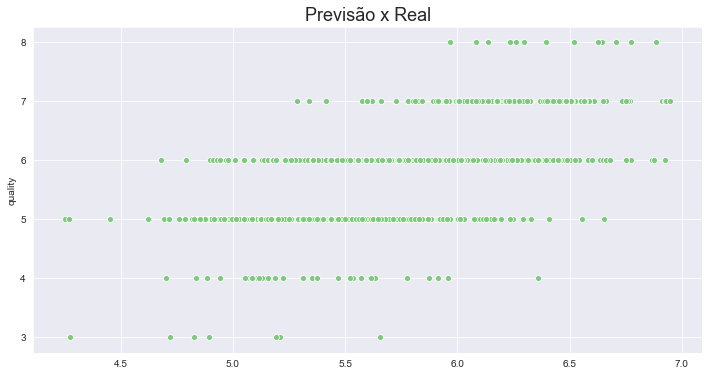

In [152]:
y_previsto_train = modelo.predict(X_train)
ax = sns.scatterplot(x=y_previsto_train, y = y_train)
ax.figure.set_size_inches(12,6)
ax.set_title('Previsão x Real', fontsize = 18)
ax

</p> Obtendo os Resíduos</p>

In [153]:
residuo = y_train - y_previsto_train

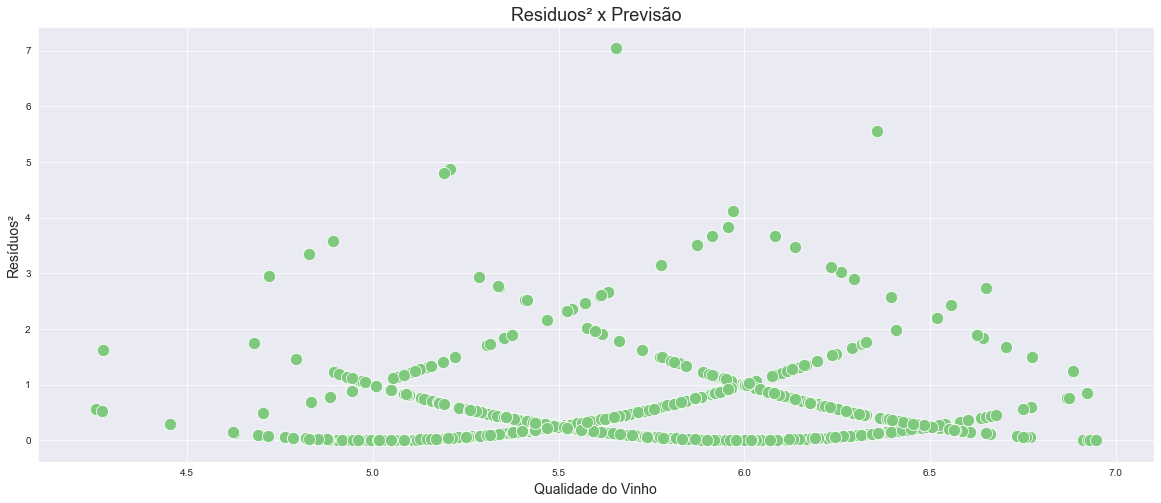

In [154]:
ax = sns.scatterplot(x=y_previsto_train, y = residuo**2, s=150)
ax.figure.set_size_inches(20,8)
ax.set_title('Residuos² x Previsão', fontsize = 18)
ax.set_xlabel("Qualidade do Vinho", fontsize=14)
ax.set_ylabel("Resíduos²", fontsize=14)
ax

<p> Esse Gráfico indica que a variação do erro não é constante.</p>

<p> Considerando os resultados encontrados e o baixo coeficiente de determinação utilizaremos outro modelo para realizar esta análise.</p>

# Modelo Random Forest

In [155]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [156]:
X = dados[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']]

<p>Transformando a coluna Quality em apenas duas categorias Bom(1) e Ruim(0):</p>

In [157]:
y = dados['quality'].apply(lambda y_value: 1 if y_value >= 6 else 0)

In [158]:
print(y)

0       0
1       0
2       0
3       1
4       0
       ..
1594    0
1595    1
1596    1
1597    0
1598    1
Name: quality, Length: 1599, dtype: int64


Separando os dados em Treino e Teste. Iremos utilizar a mesma proproção e o mesmo random state do modelo anterior para podermos comparar os resultados.

In [159]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2811)

Treinando o modelo:

In [160]:
modelo_2 = RandomForestClassifier()

In [161]:
modelo_2.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Avaliando o modelo com o coeficiente de determinação

In [162]:
X_test_previsto = modelo_2.predict(X_test)

In [163]:
accuracia_modelo_2 = accuracy_score(X_test_previsto, y_test)

In [164]:
print('Accurácia:', accuracia_modelo_2.round(2))

Accurácia: 0.82


Considerando a Acurácia de 82% do Modelo Random Forest e o Coeficiente de Determinação de 32% do primeiro modelo será adotado o segundo modelo para previsões futuras.

Salvando o modelo_2:

In [165]:
output = open('modelo_wine_quality', 'wb')
pickle.dump(modelo_2, output)
output.close()